#### TP5: Clustering BDSCAN

* Dataset: Points 

##### Packages 

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors

##### Chargement de données

In [8]:
df = pd.read_csv('Dataset/points.csv')
df

,Unnamed: 0,x,y,cluster
0,0,-8.482852,-5.603349,2
1,1,-7.751632,-8.405334,2
2,2,-10.967098,-9.032782,2
3,3,-11.999447,-7.606734,2
4,4,-1.736810,10.478015,1
...,...,...,...,...
195,195,-8.820126,-9.479259,2
196,196,-1.573419,-6.650994,0
197,197,-2.619581,8.269253,1
198,198,-2.634418,6.697531,1


##### Visualisation des données 

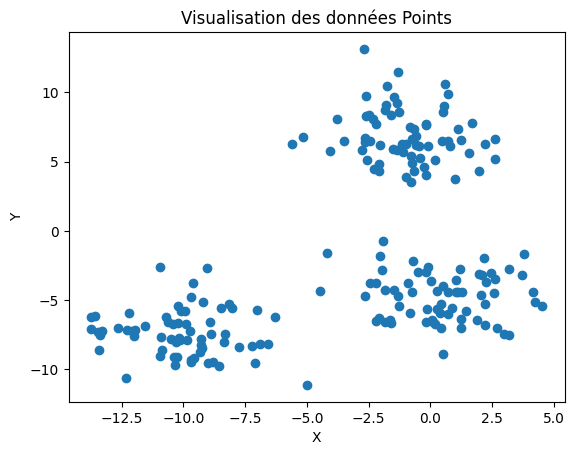

In [9]:
plt.scatter(df['x'], df['y'])
plt.title('Visualisation des données Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##### Répartition de données

In [10]:
X = df[['x', 'y']]

##### Détermination de Epsilon

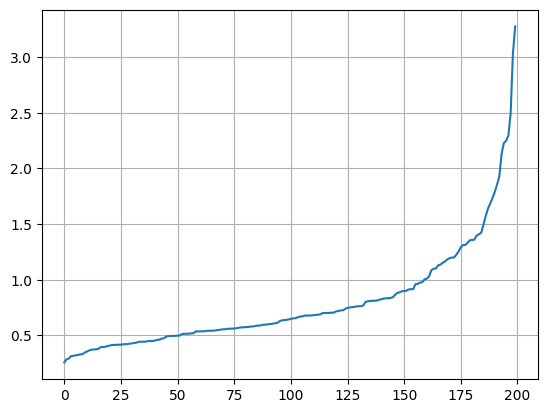

In [21]:
neighbors = NearestNeighbors(n_neighbors=5) # On prend 4 points voisins
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = distances[:,1:].mean(axis=1)
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.grid(True)
plt.show()


##### Détermination de MinPts

In [26]:
# Calcul des distances entre les points
distances = neigh.fit(X).kneighbors()[0]

# Tracer l'histogramme des distances
plt.hist(distances, bins=30)
plt.title('Histogramme des distances entre les points')
plt.xlabel('Distance')
plt.ylabel('Fréquence')
plt.show()

NameError: name 'neigh' is not defined

##### Création du modèle de DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps= 0.5,min_samples= 5)

##### Ajustement du modèle 

In [15]:
model.fit(X)

DBSCAN()

##### Détermination des clusters

In [27]:
cluster_labels = model.labels_

##### Visualisation du modèle 

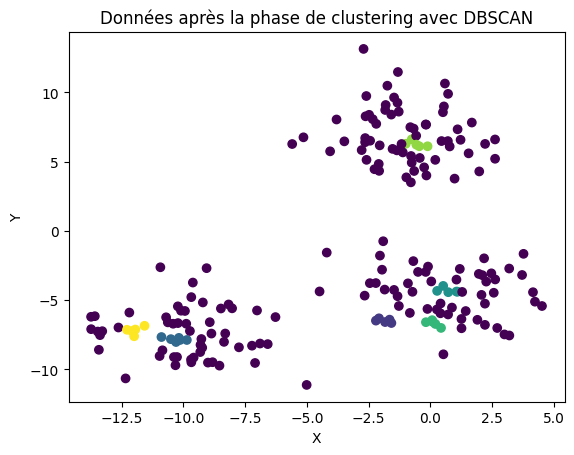

In [19]:
# Visualiser les données après la phase de clustering
plt.scatter(X['x'], X['y'], c=cluster_labels, cmap='viridis')
plt.title('Données après la phase de clustering avec DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### Evaluation du modèle 

In [28]:
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
num_noise_points = list(cluster_labels).count(-1)

print(f"Nombre de clusters : {num_clusters}")
print(f"Nombre de points considérés comme du bruit : {num_noise_points}")

Nombre de clusters : 6
Nombre de points considérés comme du bruit : 169
